In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cpp2g import CPP2
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc
import torch

In [2]:
plt.style.use('seaborn-poster')

### Instantiate a CPP2 object

In [3]:
cpp = CPP2()

### Simulate Data with the CPP Generative Model

cpp.simulate() takes the following arguments:  
- N: number of cells
- tmax: max time of simulation (prevent simulation from getting too large)
- peakmax: max number of peaks in a simulation (similar to above)
- nclusters: the number of cell types/channels to simulate (so far we've validated inference with nclusters = 1)
- p: probability of each cell type, a list of probablilities, must sum to 1
- xmax: maximum coordinate, define area of field
- mu: the basal autonomous rate of pulsing, a numpy array of size (nclusters, )
- a: magnitude of spatial interactions between cells, a numpy array of size (nclusters, nclusters) with all values > 0
- b: variance of signaling kernel, a numpy array of size (nclusters, nclusters) with all values > 0
- ajj: self-excitation intensity multiplier ($a_{self} = a_{jj} * a$), size (nclusters, ) > 0
- bjj: self-excitation kernel multiplier ($b_{self} = b_{jj} * b$), size (nclusters, ) > 0
- epsilon: the radius in which spatial interactions are on, some nonzero number
  
All values have default, don't need to be passed.   
If any of mu/a/b/ajj/bjj/epsilon is None (not passed), the values are drawn randomly. See cpp2g.py for exact details

In [5]:
cpp.simulate_with_self(N = 10, 
             tmax = 10,
             peakmax = 50,
             nclusters = 1, 
             p = [1.0],
             xmax = 700, 
             mu = .1 * np.ones(1),
             a = None, 
             b = None,
             epsilon =  None)

50


### Represent your data with an animation

Use these two functions to create and display an animation in jupyter notebook  
Dots represent cell coordinates and big cell indicates peak  
Different clusters will have different colors  
This video can be saved to file as well    
Be warned it takes a while with lots of cells and peaks

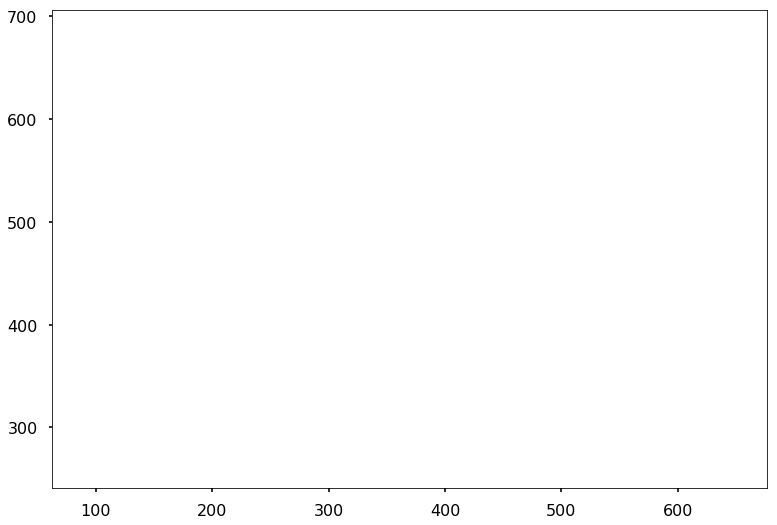

In [6]:
anim = cpp.animate()

In [7]:
HTML(anim.to_jshtml())

### Perform inference!

In [9]:
cpp.format_data() # changes data internally to formats used for inferences
cpp.set_init(mu_init = cpp.get_mu_true(), a_init = cpp.get_a_true(), ajj_init = None, 
              b_init = 1 * np.ones((1,1)), epsilon_init = cpp.get_epsilon_true(), nclusters = None)
cpp.negLogL_with_self(cpp.y_sorted, cpp.cells_sorted, cpp.d, cpp.clusters, kernel = 'fixed')

tensor(-82.3199, grad_fn=<NegBackward>)

In [10]:
cpp.fit_with_self(iters = 10, sharpness = 0.001, kernel = 'logistic', lr = 1e-5)

0/10 logL: -36.535987854003906
1/10 logL: -36.53734588623047
2/10 logL: -36.538726806640625
3/10 logL: -36.540096282958984
4/10 logL: -36.541465759277344
5/10 logL: -36.5428352355957
6/10 logL: -36.5442008972168
7/10 logL: -36.54558563232422
8/10 logL: -36.54694747924805
9/10 logL: -36.54832077026367
Final logL: -36.54832077026367 at iteration 9


Now we can compare to the estimated (learned) values to the true values

In [11]:
print(cpp.get_mu_learned())
print(cpp.get_mu_true())

tensor([0.1000], dtype=torch.float64)
[0.1]


In [12]:
print(cpp.get_a_learned())
print(cpp.get_a_true())

tensor([[1.9096]], dtype=torch.float64)
[[1.91028935]]


In [15]:
print(cpp.get_ajj_learned())
print(cpp.get_ajj_true())

tensor([1.3135], dtype=torch.float64)
[1.6934274]


In [13]:
print(cpp.get_b_learned())
print(cpp.get_b_true())

tensor([[0.9996]], dtype=torch.float64)
[[0.82548294]]


In [14]:
print(cpp.get_bjj_learned())
print(cpp.get_bjj_true())

tensor([1.0003], dtype=torch.float64)
[1.78417918]
